
# **Proyecto DIFF**


# CAUSANTES DE INCENDIOS FORESTALES

Estos fenómenos se originan por agentes naturales como las descargas eléctricas atmosféricas o las erupciones volcánicas. Sin embargo, en la mayoría de los casos, son ocasionados por la actividad humana. Entre las causas más frecuentes están los residuos en zonas boscosas que ocasionan chispas o puntos de ignición al contacto con el sol, por ejemplo: botellas de vidrio, colillas de cigarrillos, fogatas, fuegos artificiales, líneas de transmisión de energía o catenarias de vías férreas que generan puntos de contacto directo con la naturaleza a su alrededor; incluso, las quemas controladas para la fertilización de suelos con fines productivos pueden salirse de control y causar incendios.

# DATA SET

1. FIRE AND NON FIRE DATASET:
El conjunto de datos completo se divide en dos carpetas llamadas "Datos de Prueba" y "Datos de Entrenamiento". Los Datos de Prueba contienen aproximadamente 50 imágenes de Incendios y No Incendios combinados. Los Datos de Entrenamiento contienen 5000 imágenes de Incendios y No Incendios combinados. Cada una de estas carpetas se divide en dos subcarpetas llamadas "Incendio" y "No Incendio". Cada una de estas subcarpetas dentro de los Datos de Prueba tiene 25 imágenes, y cada una de estas subcarpetas dentro de los Datos de Entrenamiento tiene 2500 imágenes.
source:https://www.kaggle.com/datasets/mohnishsaiprasad/forest-fire-images



2. SMOKE DATA SET: Se extrajo una parte del conjunto de datos debido a su magnitud. La nueva carpeta contiene 3000 imágenes de señales de humo en zonas verdes que serán utilizadas para el entrenamiento, mientras que las imágenes de prueba son alrededor de 25.
source: https://www.kaggle.com/datasets/kutaykutlu/forest-fire

3. WILDFIRE SMOKE DATA SET: This dataset contains all the train, test, valid splits for training a yolo model for detecting wildfire smoke. +600 aprox para el train y 75 de test
source: https://www.kaggle.com/datasets/ahemateja19bec1025/wildfiresmokedatasetyolo

In [ ]:
# JUAN PABLO RAMIREZ VELA - 2190076 - IA 2

import os
import gc
import cv2
import random
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from tensorflow.keras import layers

In [ ]:
!pip install kaggle
from google.colab import files

# Sube el archivo JSON con tus credenciales de Kaggle API
files.upload()

# Verifica si el archivo está en el directorio correcto
!ls -lha kaggle.json

# Mueve el archivo al directorio adecuado y otorga los permisos correctos
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip install gdown

In [ ]:
!kaggle datasets download -d ahemateja19bec1025/wildfiresmokedatasetyolo
!unzip wildfiresmokedatasetyolo.zip
!kaggle datasets download -d mohnishsaiprasad/forest-fire-images
!unzip forest-fire-images.zip


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#!kaggle datasets download -d kutaykutlu/forest-fire
#!unzip forest-fire.zip

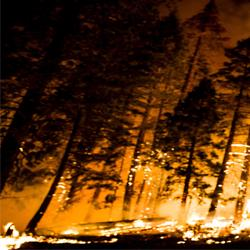

In [ ]:
#IMAGEN DATA TRAIN FIRE


img = cv2.imread('/content/Data/Train_Data/Fire/F_100.jpg')
cv2_imshow(img)


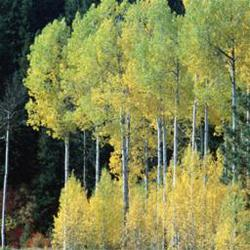

In [ ]:
#IMAGEN DATA TRAIN NO FIRE

img = cv2.imread('/content/Data/Train_Data/Non_Fire/NF_200.jpg')
cv2_imshow(img)


In [ ]:
img.shape

(250, 250, 3)

In [ ]:
#@title **-** CARGAMOS LAS IMAGENES DE ENTRENAMIENTO PARA FIRE
#@title **-** RESIZE

image_size_a = 128
image_size_b = 128
#CARGAMOS TRAIN FIRE
fire = "/content/Data/Train_Data/Fire/"
images_fire = []
for image_name in os.listdir(fire):
  image_path = os.path.join(fire, image_name)
  image = cv2.imread(image_path)
  if image is not None:
    resized_image = cv2.resize(image, (image_size_a, image_size_b))
    images_fire.append(resized_image)
  else:
    print(f"Error al leer la imagen: {image_path}")
print("Número de imágenes cargadas correctamente:",len(images_fire))

Error al leer la imagen: /content/Data/Train_Data/Fire/F_616.jpg
Error al leer la imagen: /content/Data/Train_Data/Fire/F_647.jpg
Error al leer la imagen: /content/Data/Train_Data/Fire/F_793.jpg
Error al leer la imagen: /content/Data/Train_Data/Fire/F_586.jpg
Error al leer la imagen: /content/Data/Train_Data/Fire/F_899.jpg
Error al leer la imagen: /content/Data/Train_Data/Fire/F_801.jpg
Error al leer la imagen: /content/Data/Train_Data/Fire/F_62.jpg
Error al leer la imagen: /content/Data/Train_Data/Fire/F_740.jpg
Error al leer la imagen: /content/Data/Train_Data/Fire/F_837.jpg
Error al leer la imagen: /content/Data/Train_Data/Fire/F_710.jpg
Error al leer la imagen: /content/Data/Train_Data/Fire/F_895.jpg
Error al leer la imagen: /content/Data/Train_Data/Fire/F_648.jpg
Error al leer la imagen: /content/Data/Train_Data/Fire/F_876.jpg
Error al leer la imagen: /content/Data/Train_Data/Fire/F_735.jpg
Error al leer la imagen: /content/Data/Train_Data/Fire/F_686.jpg
Error al leer la imagen: /

In [ ]:
cv2_imshow(images_fire[0])
images_fire[0].shape

In [ ]:
#@title **-** CARGAMOS LAS IMAGENES DE ENTRENAMINETO PARA NON FIRE

#CARGAMOS TRAIN NO FIRE
Nfire = "/content/Data/Train_Data/Non_Fire/"
images_no_fire = []
for image_name in os.listdir(Nfire):
  image_path = os.path.join(Nfire, image_name)
  image = cv2.imread(image_path)
  if image is not None:
    resized_image = cv2.resize(image, (image_size_a, image_size_b))

    images_no_fire.append(resized_image)
  else:
    print(f"Error al leer la imagen: {image_path}")
print("Número de imágenes cargadas correctamente:",len(images_no_fire))

Error al leer la imagen: /content/Data/Train_Data/Non_Fire/NF_1003.jpg
Número de imágenes cargadas correctamente: 2499


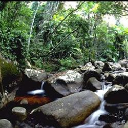

(128, 128, 3)

In [ ]:
cv2_imshow(images_no_fire[0])
images_fire[0].shape

In [ ]:
#@title **-** CARGAMOS LAS IMAGENES DE TESTEO PARA FIRE

#CARGAMOS TEST FIRE
fire_test = "/content/Data/Test_Data/Fire/"
images_test_fire = []
for image_name in os.listdir(fire_test):
  image_path = os.path.join(fire_test, image_name)
  image = cv2.imread(image_path)
  if image is not None:
    resized_image = cv2.resize(image, (image_size_a, image_size_b))

    images_test_fire.append(resized_image)
  else:
    print(f"Error al leer la imagen: {image_path}")
print("Número de imágenes cargadas correctamente:",len(images_test_fire))

Número de imágenes cargadas correctamente: 25


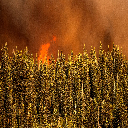

(128, 128, 3)

In [ ]:
cv2_imshow(images_test_fire[0])
images_fire[0].shape

In [ ]:
#@title **-** CARGAMOS LAS IMAGENES DE TESTEO PARA NON FIRE

#CARGAMOS TEST NO FIRE
Nfire_test = "/content/Data/Test_Data/Non_Fire"
images_test_no_fire = []
for image_name in os.listdir(Nfire_test):
  image_path = os.path.join(Nfire_test, image_name)
  image = cv2.imread(image_path)
  if image is not None:
    resized_image = cv2.resize(image, (image_size_a, image_size_b))

    images_test_no_fire.append(resized_image)
  else:
    print(f"Error al leer la imagen: {image_path}")
print("Número de imágenes cargadas correctamente:",len(images_test_no_fire))

Número de imágenes cargadas correctamente: 25


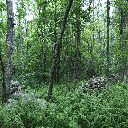

(128, 128, 3)

In [ ]:
cv2_imshow(images_test_no_fire[0])
images_fire[0].shape


In [ ]:
#@title **-** PASAMOS LA LISTA DE SMOKE A UN ARRAY DE NUMPY

images_fire = np.array(images_fire);
images_no_fire = np.array(images_no_fire);
images_test_fire = np.array(images_test_fire);
images_test_no_fire = np.array(images_test_no_fire);

print("DIMENSIONES de imágenes cargadas :",images_fire.shape)
print("DIMENSIONES de imágenes cargadas :",images_no_fire.shape)
print("DIMENSIONES de imágenes cargadas :",images_test_fire.shape)
print("DIMENSIONES de imágenes cargadas :",images_test_no_fire.shape)

DIMENSIONES de imágenes cargadas : (2110, 128, 128, 3)
DIMENSIONES de imágenes cargadas : (2499, 128, 128, 3)
DIMENSIONES de imágenes cargadas : (25, 128, 128, 3)
DIMENSIONES de imágenes cargadas : (25, 128, 128, 3)


In [ ]:
#@title **-** AGRUPAMOS LOS DATOS DE ENTRENAMINETO Y TESTEO


X_train = np.concatenate((images_fire, images_no_fire))
X_test = np.concatenate((images_test_fire, images_test_no_fire))

# Cantidad de datos de entrenamiento y prueba
print(f"Cantidad de datos de entrenamiento: {X_train.shape[0]}")
print(f"Cantidad de datos de prueba: {X_test.shape[0]}\n")


print(f"Dimension de datos de entrenamiento: {X_train.shape}")
print(f"Dimension de datos de prueba: {X_test.shape}\n")

Cantidad de datos de entrenamiento: 4609
Cantidad de datos de prueba: 50

Dimension de datos de entrenamiento: (4609, 128, 128, 3)
Dimension de datos de prueba: (50, 128, 128, 3)



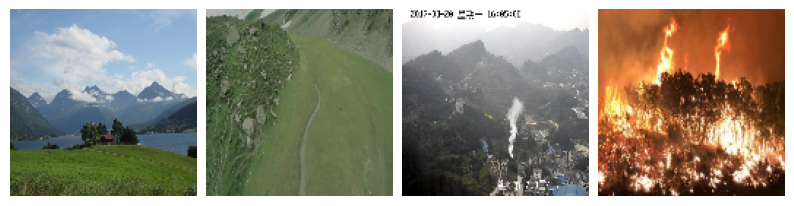

In [ ]:
import random
import matplotlib.pyplot as plt
import cv2
import numpy as np

plt.figure(figsize=(10, 5))
indices = random.sample(range(X_train.shape[0]), 4)
for i, index in enumerate(indices, start=1):
    img = X_train[index]  # Accede a la imagen directamente desde el arreglo
    img_uint8 = (img * 255).astype(np.uint8)

    # Convierte a formato RGB
    img_rgb = cv2.cvtColor(img_uint8, cv2.COLOR_BGR2RGB)

    plt.subplot(1, 4, i)
    plt.imshow(img_rgb)
    plt.axis('off')  # Oculta los ejes y los números de los ejes
plt.subplots_adjust(wspace=0.05)
plt.show()


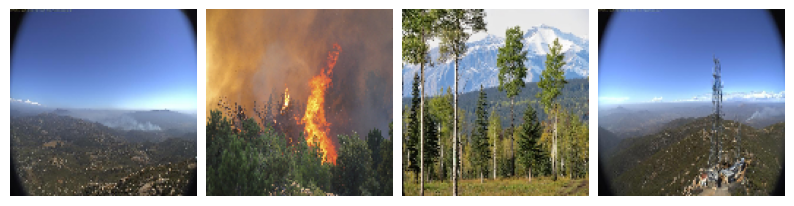

In [ ]:
import random
import matplotlib.pyplot as plt
import cv2
import numpy as np

plt.figure(figsize=(10, 5))
indices = random.sample(range(X_test.shape[0]), 4)
for i, index in enumerate(indices, start=1):
    img = X_test[index]  # Accede a la imagen directamente desde el arreglo
    #img_uint8 = (img * 255).astype(np.uint8)
    # Convierte a formato RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(1, 4, i)
    plt.imshow(img_rgb)
    plt.axis('off')  # Oculta los ejes y los números de los ejes
plt.subplots_adjust(wspace=0.05)
plt.show()


In [ ]:
#@title **-** PRE PROCESAMIENTO DE LOS CONJUNTOS

from sklearn.model_selection import train_test_split

# Normalización de los datos
X_train_norm = X_train / 255.0
X_test_norm = X_test / 255.0

# Etiquetas para los conjuntos de entrenamiento y prueba
y_train = np.concatenate((np.ones(len(images_fire)), np.zeros(len(images_no_fire))))
y_test = np.concatenate((np.ones(len(images_test_fire)), np.zeros(len(images_test_no_fire))))

# División en conjuntos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_train_norm, y_train, test_size=0.2)

print(f"Tamaño de X_train: {X_train_norm.shape}")
print(f"Tamaño de y_train: {y_train.shape}")
print(f"Tamaño de X_val: {X_val.shape}")
print(f"Tamaño de y_val: {y_val.shape}")
print(f"Tamaño de X_test_norm: {X_test_norm.shape}")
print(f"Tamaño de y_test: {y_test.shape}")




Tamaño de X_train: (4609, 128, 128, 3)
Tamaño de y_train: (3687,)
Tamaño de X_val: (922, 128, 128, 3)
Tamaño de y_val: (922,)
Tamaño de X_test_norm: (50, 128, 128, 3)
Tamaño de y_test: (50,)


In [ ]:
#@title **-** CNN PRIMER MODELO CLASIFICACION BINARIA
import tensorflow as tf
from tensorflow.keras import layers

model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_size_a, image_size_b, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compilación del modelo
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:

# Entrenamiento del modelo
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))



Epoch 1/50
116/116 [==============================] - 16s 30ms/step - loss: 0.3163 - accuracy: 0.8636 - val_loss: 0.1846 - val_accuracy: 0.9403
Epoch 2/50
116/116 [==============================] - 2s 20ms/step - loss: 0.2086 - accuracy: 0.9213 - val_loss: 0.1471 - val_accuracy: 0.9501
Epoch 3/50
116/116 [==============================] - 2s 20ms/step - loss: 0.1747 - accuracy: 0.9352 - val_loss: 0.1375 - val_accuracy: 0.9523
Epoch 4/50
116/116 [==============================] - 2s 19ms/step - loss: 0.1619 - accuracy: 0.9411 - val_loss: 0.1299 - val_accuracy: 0.9479
Epoch 5/50
116/116 [==============================] - 2s 20ms/step - loss: 0.1473 - accuracy: 0.9452 - val_loss: 0.1624 - val_accuracy: 0.9306
Epoch 6/50
116/116 [==============================] - 3s 22ms/step - loss: 0.1035 - accuracy: 0.9634 - val_loss: 0.1276 - val_accuracy: 0.9523
Epoch 7/50
116/116 [==============================] - 2s 20ms/step - loss: 0.0779 - accuracy: 0.9710 - val_loss: 0.1093 - val_accuracy: 0.958

In [ ]:
#@title **-** EVALUACION DEL MODELO PARA FIRE Y NON FIRE
loss, accuracy = model.evaluate(X_test_norm, y_test)
print(f"Pérdida en el conjunto de prueba: {loss}")
print(f"Precisión en el conjunto de prueba: {accuracy}")

2/2 [==============================] - 0s 202ms/step - loss: 1.1033 - accuracy: 0.9200
Pérdida en el conjunto de prueba: 1.1033364534378052
Precisión en el conjunto de prueba: 0.9200000166893005


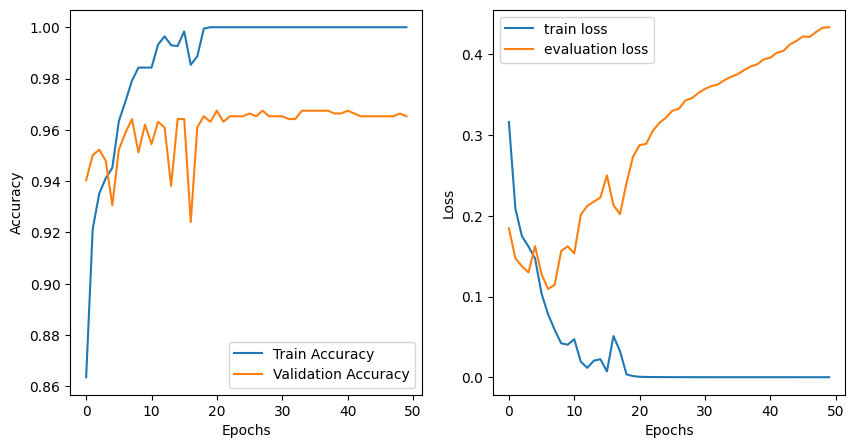

In [ ]:
fig = plt.figure(figsize=(10,5))

# Accuracy
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();

# Loss
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

In [ ]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test_norm)
y_pred_labels = (y_pred > 0.5).astype(int)

# Generate classification report
report = classification_report(y_test, y_pred_labels)

print(report)

2/2 [==============================] - 0s 8ms/step
              precision    recall  f1-score   support

         0.0       0.96      0.88      0.92        25
         1.0       0.89      0.96      0.92        25

    accuracy                           0.92        50
   macro avg       0.92      0.92      0.92        50
weighted avg       0.92      0.92      0.92        50



1/1 [==============================] - 0s 43ms/step
La imagen es de un posible incendio.
1/1 [==============================] - 0s 34ms/step
La imagen es de un posible incendio.
1/1 [==============================] - 0s 62ms/step
La imagen no contiene  fuego.
1/1 [==============================] - 0s 73ms/step
La imagen es de un posible incendio.


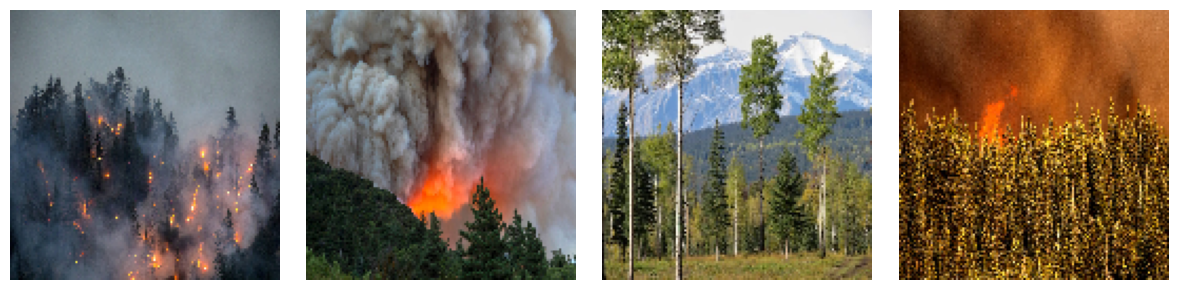

In [ ]:
# Selecciona cuatro imágenes al azar del conjunto de prueba de fuego
indices = random.sample(range(len(X_test)), 4)

# Crea una figura con cuatro subtramas en una fila
fig, axes = plt.subplots(1, 4, figsize=(12, 3))


# Itera sobre los índices seleccionados
for i, index in enumerate(indices):
    # Obtiene la imagen y la etiqueta correspondiente
    image = X_test[index]
    true_label = y_test[index]

    # Agrega una dimensión adicional para que coincida con el formato de entrada del modelo
    image_input = np.expand_dims(image, axis=0)

    # Realiza la predicción del modelo
    prediction = model.predict(image_input)

    # Aplica un umbral para obtener la etiqueta binaria
    threshold = 0.5
    predicted_label = 1 if prediction > threshold else 0

    # Imprime la etiqueta predicha
    if predicted_label == 1:
        print("La imagen es de un posible incendio.")
    else:
        print("La imagen no contiene  fuego.")
    img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    axes[i].imshow(img_rgb)
    axes[i].axis('off')


# Mostrar la figura
plt.tight_layout()
plt.show()




---



# AGREGAMOS UNA NUEVA CARACTERISTICA: DETECCION DE HUMO DE INCENDIO FORESTAL!!

Hasta este punto el proyecto solo detecta si hay fuego o no en la zona boscosa. Los resultados parecen bastante prometedores solamente con estas dos caracterisitcas de clasificacion. A partir de aqui se plantea agregar una nueva caracteristica para agregar dificultad al modelo.

In [ ]:
#@title **-** CARGAMOS LAS IMAGENES DE ENTRENAMIENTO PARA SMOKE SET 1

#CARGAMOS TRAIN SMOKE
fire = "/content/drive/MyDrive/Data3/train_smoke"
images_smoke = []
for image_name in os.listdir(fire):
  image_path = os.path.join(fire, image_name)
  image = cv2.imread(image_path)
  if image is not None:
    resized_image = cv2.resize(image, (image_size_a, image_size_b))
    images_smoke.append(resized_image)
  else:
    print(f"Error al leer la imagen: {image_path}")
print("Número de imágenes cargadas correctamente:",len(images_smoke))

Número de imágenes cargadas correctamente: 3111


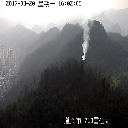

(128, 128, 3)

In [ ]:
cv2_imshow(images_smoke[0])
images_smoke[0].shape

In [ ]:
import random

# Obtener una selección aleatoria de 1700 imágenes
images_smoke = random.sample(images_smoke, 1700)

# Verificar el número de imágenes seleccionadas
print("Número de imágenes seleccionadas:", len(images_smoke))

Número de imágenes seleccionadas: 1700


In [ ]:
#@title **-** CARGAMOS LAS IMAGENES DE ENTRENAMIENTO PARA TEST SMOKE SET 1

#CARGAMOS test de smoke
fire = "/content/drive/MyDrive/Data3/test_small"
images_test_smoke = []
for image_name in os.listdir(fire):
  image_path = os.path.join(fire, image_name)
  image = cv2.imread(image_path)
  if image is not None:
    resized_image = cv2.resize(image, (image_size_a, image_size_b))
    images_test_smoke.append(resized_image)
  else:
    print(f"Error al leer la imagen: {image_path}")
print("Número de imágenes cargadas correctamente:",len(images_test_smoke))

Número de imágenes cargadas correctamente: 25


In [ ]:
import random

# Obtener una selección aleatoria de 1700 imágenes
images_test_smoke = random.sample(images_test_smoke, 12)

# Verificar el número de imágenes seleccionadas
print("Número de imágenes seleccionadas:", len(images_test_smoke))

Número de imágenes seleccionadas: 12


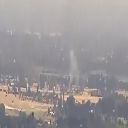

(128, 128, 3)

In [ ]:
cv2_imshow(images_test_smoke[0])
images_test_smoke[0].shape

In [ ]:
#@title **-** PASAMOS LA LISTA DE SMOKE TRAIN Y TEST A UN ARRAY DE NUMPY
images_smoke = np.array(images_smoke);
images_test_smoke = np.array(images_test_smoke);
print("DIMENSIONES de imágenes cargadas :",images_smoke.shape)
print("DIMENSIONES de imágenes cargadas :",images_test_smoke.shape)


DIMENSIONES de imágenes cargadas : (3111, 128, 128, 3)
DIMENSIONES de imágenes cargadas : (25, 128, 128, 3)


In [ ]:
#@title **-** AGRUPAMOS LOS DATOS DE ENTRENAMINETO Y TESTEO NUEVAMENTE CON LOS TRES TIPOS DE IMAGENES

X_train = np.concatenate((images_fire, images_no_fire, images_smoke))

# Concatenar los conjuntos de imágenes de prueba
X_test = np.concatenate((images_test_fire, images_test_no_fire, images_test_smoke))


# Cantidad de datos de entrenamiento y prueba
print(f"Cantidad de datos de entrenamiento: {X_train.shape[0]}")
print(f"Cantidad de datos de prueba: {X_test.shape[0]}\n")


print(f"Dimension de datos de entrenamiento: {X_train.shape}")
print(f"Dimension de datos de prueba: {X_test.shape}\n")

Cantidad de datos de entrenamiento: 7720
Cantidad de datos de prueba: 75

Dimension de datos de entrenamiento: (7720, 128, 128, 3)
Dimension de datos de prueba: (75, 128, 128, 3)



In [ ]:
#@title **-** PRE PROCESAMIENTO DE LOS NUEVOS CONJUNTOS

from sklearn.model_selection import train_test_split

# Normalización de los datos
X_train_norm = X_train / 255.0
X_test_norm = X_test / 255.0

# Etiquetas para los conjuntos de entrenamiento y prueba
y_train = np.concatenate((np.ones(len(images_fire)), np.zeros(len(images_no_fire)), np.full(len(images_smoke), 2)))
y_test = np.concatenate((np.ones(len(images_test_fire)), np.zeros(len(images_test_no_fire)), np.full(len(images_test_smoke), 2)))

#1 - FIRE   0 - NON FIRE   2 - SMOKE

# Codificación one-hot de las etiquetas
num_classes = 3
y_train = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=num_classes)

# División en conjuntos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_train_norm, y_train, test_size=0.2)





In [ ]:
print(f"Tamaño de X_train: {X_train.shape}")
print(f"Tamaño de y_train: {y_train.shape}")
print(f"Tamaño de X_val: {X_val.shape}")
print(f"Tamaño de y_val: {y_val.shape}")

print(f"Tamaño de X_test_norm: {X_test_norm.shape}")
print(f"Tamaño de y_test: {y_test.shape}")
print(f"Tamaño de X_train_norm: {X_train_norm.shape}")
print(f"Tamaño de X_test_norm: {X_test_norm.shape}")

print("X samples value: ", X_train.shape, "Y samples value: ", y_train.shape, "Max value on X: ", np.max(X_train_norm), "Min value on X", np.min(X_train_norm))

Tamaño de X_train: (6176, 128, 128, 3)
Tamaño de y_train: (6176, 3)
Tamaño de X_val: (1544, 128, 128, 3)
Tamaño de y_val: (1544, 3)
Tamaño de X_test_norm: (75, 128, 128, 3)
Tamaño de y_test: (75, 3)
Tamaño de X_train_norm: (7720, 128, 128, 3)
Tamaño de X_test_norm: (75, 128, 128, 3)
X samples value:  (6176, 128, 128, 3) Y samples value:  (6176, 3) Max value on X:  1.0 Min value on X 0.0


In [ ]:
#@title **-** CNN PRIMER MODELO CON LOS NUEVOS DATOS


model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_size_a, image_size_b, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(3, activation='softmax')
])

learning_rate = 0.001


optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# Compilación del modelo
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 126, 126, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 61, 61, 64)       256       
 hNormalization)                                                 
                                                        

In [ ]:
# Entrenamiento del modelo
history = model.fit(X_train, y_train, batch_size=32, epochs=15, validation_data=(X_val, y_val))


Epoch 1/15
193/193 [==============================] - 23s 46ms/step - loss: 0.1626 - accuracy: 0.9385 - val_loss: 2.6344 - val_accuracy: 0.4851
Epoch 2/15
193/193 [==============================] - 5s 27ms/step - loss: 0.1019 - accuracy: 0.9607 - val_loss: 1.5682 - val_accuracy: 0.4968
Epoch 3/15
193/193 [==============================] - 5s 24ms/step - loss: 0.0738 - accuracy: 0.9731 - val_loss: 0.4639 - val_accuracy: 0.7630
Epoch 4/15
193/193 [==============================] - 5s 25ms/step - loss: 0.0637 - accuracy: 0.9773 - val_loss: 0.2358 - val_accuracy: 0.9417
Epoch 5/15
193/193 [==============================] - 5s 25ms/step - loss: 0.0488 - accuracy: 0.9825 - val_loss: 0.0838 - val_accuracy: 0.9670
Epoch 6/15
193/193 [==============================] - 5s 25ms/step - loss: 0.0319 - accuracy: 0.9895 - val_loss: 0.1514 - val_accuracy: 0.9579
Epoch 7/15
193/193 [==============================] - 5s 26ms/step - loss: 0.0315 - accuracy: 0.9887 - val_loss: 0.1063 - val_accuracy: 0.964

In [ ]:
model.save('/content/fire.h5')

In [ ]:
#model = tf.keras.models.load_model('/content/fire.h5')

In [ ]:
#@title **-** EVALUACION DEL MODELO DE PRUEBA PARA ESTAS TRES CARACTERISTICAS

loss, accuracy = model.evaluate(X_test_norm, y_test)
print(f"Pérdida en el conjunto de prueba: {loss}")
print(f"Precisión en el conjunto de prueba: {accuracy}")

3/3 [==============================] - 0s 88ms/step - loss: 4.2136 - accuracy: 0.5867
Pérdida en el conjunto de prueba: 4.213595390319824
Precisión en el conjunto de prueba: 0.5866666436195374


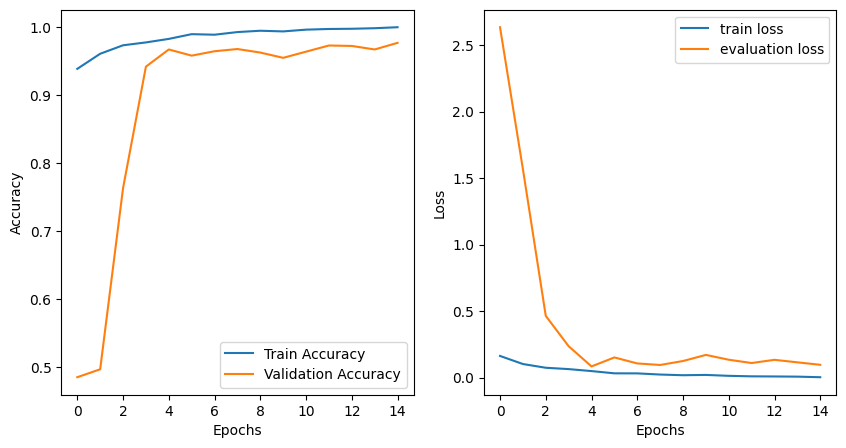

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

In [ ]:
from sklearn.metrics import classification_report

# Obtener las predicciones del conjunto de prueba
y_pred = model.predict(X_test_norm)
y_pred = np.argmax(y_pred, axis=1)  # Convertir las predicciones a etiquetas numéricas

# Obtener las etiquetas reales del conjunto de prueba
y_true = np.argmax(y_test, axis=1)  # Convertir las etiquetas codificadas a etiquetas numéricas

# Generar el informe de clasificación
report = classification_report(y_true, y_pred)
print(report)

3/3 [==============================] - 0s 8ms/step
              precision    recall  f1-score   support

           0       0.61      0.92      0.73        25
           1       0.57      0.84      0.68        25
           2       0.00      0.00      0.00        25

    accuracy                           0.59        75
   macro avg       0.39      0.59      0.47        75
weighted avg       0.39      0.59      0.47        75



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# PRIMERA CONCLUSION AL USAR LAS TRES CARACTERISTICAS

AL parecer le estaba costando al modelo identificar las images de smoke correctamenten, entonces se hizo una revision al dataset usado y se encontro que las imagenes podrian ser el problema. Ya que las imagenes eran producto de una edicion intensionada que podria generar un sesgo debido al tamañao del conjunto. En el dataset originalmente hay +10000 imgs de smoke editadas pero aqui se usaron solo 3000 aproximadas, puede ser este el problema.

# CAMBIAR EL DATA SET DE SMOKE

In [ ]:
#@title **-** USAREMOS OTRO DATA SET PARA EL HUMO

USANDO EN DATA SET DE SOLO +600 IMS DE HUEMO DE INCENDIO FORESTAL ---->



---



In [ ]:
#@title **-** CARGAMOS LAS IMAGENES DE ENTRENAMIENTO PARA SMOKE SET 2

#CARGAMOS test de smoke
fire = "/content/Data2/train/images"
images_smoke = []
for image_name in os.listdir(fire):
  image_path = os.path.join(fire, image_name)
  image = cv2.imread(image_path)
  if image is not None:
    resized_image = cv2.resize(image, (image_size_a, image_size_b))
    images_smoke.append(resized_image)
  else:
    print(f"Error al leer la imagen: {image_path}")
print("Número de imágenes cargadas correctamente:",len(images_smoke))

Número de imágenes cargadas correctamente: 516


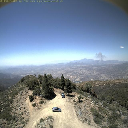

(128, 128, 3)

In [ ]:
cv2_imshow(images_smoke[0])
images_smoke[0].shape

In [ ]:
#@title **-** CARGAMOS LAS IMAGENES DE TESTEO PARA SMOKE SET 2

#CARGAMOS test de smoke
fire = "/content/Data2/test/images"
images_test_smoke = []
for image_name in os.listdir(fire):
  image_path = os.path.join(fire, image_name)
  image = cv2.imread(image_path)
  if image is not None:
    resized_image = cv2.resize(image, (image_size_a, image_size_b))
    images_test_smoke.append(resized_image)
  else:
    print(f"Error al leer la imagen: {image_path}")
print("Número de imágenes cargadas correctamente:",len(images_test_smoke))

Número de imágenes cargadas correctamente: 74


In [ ]:
import random

# Obtener una selección aleatoria de 2300 imágenes
images_test_smoke = random.sample(images_test_smoke, 25)

# Verificar el número de imágenes seleccionadas
print("Número de imágenes seleccionadas:", len(images_test_smoke))

Número de imágenes seleccionadas: 25


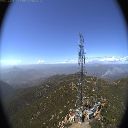

(128, 128, 3)

In [ ]:
cv2_imshow(images_test_smoke[0])
images_test_smoke[0].shape

In [ ]:
#@title **-** PASAMOS LA LISTA DE SMOKE A UN ARRAY DE NUMPY
images_smoke = np.array(images_smoke);
images_test_smoke = np.array(images_test_smoke);
print("DIMENSIONES de imágenes cargadas :",images_smoke.shape)
print("DIMENSIONES de imágenes cargadas :",images_test_smoke.shape)

DIMENSIONES de imágenes cargadas : (516, 128, 128, 3)
DIMENSIONES de imágenes cargadas : (25, 128, 128, 3)


In [ ]:
#@title **-** AGRUPAMOS LOS DATOS DE ENTRENAMINETO Y TESTEO NUEVAMENTE

X_train = np.concatenate((images_fire, images_no_fire, images_smoke))

# Concatenar los conjuntos de imágenes de prueba
X_test = np.concatenate((images_test_fire, images_test_no_fire, images_test_smoke))


# Cantidad de datos de entrenamiento y prueba
print(f"Cantidad de datos de entrenamiento: {X_train.shape[0]}")
print(f"Cantidad de datos de prueba: {X_test.shape[0]}\n")


print(f"Dimension de datos de entrenamiento: {X_train.shape}")
print(f"Dimension de datos de prueba: {X_test.shape}\n")

Cantidad de datos de entrenamiento: 5125
Cantidad de datos de prueba: 75

Dimension de datos de entrenamiento: (5125, 128, 128, 3)
Dimension de datos de prueba: (75, 128, 128, 3)



In [ ]:
#@title **-** PRE PROCESAMIENTO DE LOS NUEVOS CONJUNTOS

from sklearn.model_selection import train_test_split

# Normalización de los datos
X_train_norm = X_train / 255.0
X_test_norm = X_test / 255.0

# Etiquetas para los conjuntos de entrenamiento y prueba
y_train = np.concatenate((np.ones(len(images_fire)), np.zeros(len(images_no_fire)), np.full(len(images_smoke), 2)))
y_test = np.concatenate((np.ones(len(images_test_fire)), np.zeros(len(images_test_no_fire)), np.full(len(images_test_smoke), 2)))

# Codificación one-hot de las etiquetas
num_classes = 3
y_train = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=num_classes)

# División en conjuntos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_train_norm, y_train, test_size=0.2)




In [ ]:
#@title **-** ULTIMO MODELO DE CNN CON MAS CAPAS Y UNA DROPOUT

from tensorflow.keras import layers
from tensorflow.keras import optimizers

model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_size_a, image_size_b, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),  # Agregar más capas convolucionales
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),  # Aumentar el número de neuronas en la capa densa
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')
])
learning_rate=0.001
model.compile(optimizer=optimizers.Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0

In [ ]:
# Entrenamiento del modelo

epochs = 50
batch_size = 32

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))



Epoch 1/50
129/129 [==============================] - 9s 32ms/step - loss: 0.4472 - accuracy: 0.8285 - val_loss: 0.2927 - val_accuracy: 0.8859
Epoch 2/50
129/129 [==============================] - 3s 20ms/step - loss: 0.2497 - accuracy: 0.9210 - val_loss: 0.1684 - val_accuracy: 0.9415
Epoch 3/50
129/129 [==============================] - 3s 20ms/step - loss: 0.2023 - accuracy: 0.9371 - val_loss: 0.1661 - val_accuracy: 0.9327
Epoch 4/50
129/129 [==============================] - 3s 21ms/step - loss: 0.1408 - accuracy: 0.9520 - val_loss: 0.1417 - val_accuracy: 0.9483
Epoch 5/50
129/129 [==============================] - 3s 20ms/step - loss: 0.1349 - accuracy: 0.9524 - val_loss: 0.1479 - val_accuracy: 0.9502
Epoch 6/50
129/129 [==============================] - 3s 22ms/step - loss: 0.1324 - accuracy: 0.9576 - val_loss: 0.1735 - val_accuracy: 0.9346
Epoch 7/50
129/129 [==============================] - 3s 21ms/step - loss: 0.1148 - accuracy: 0.9590 - val_loss: 0.1492 - val_accuracy: 0.9502

In [ ]:
model.save('/content/secondfire.h5')

In [ ]:
# Evaluación del modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test_norm, y_test)
print(f"Pérdida en el conjunto de prueba: {loss}")
print(f"Precisión en el conjunto de prueba: {accuracy}")

3/3 [==============================] - 0s 99ms/step - loss: 0.8022 - accuracy: 0.9067
Pérdida en el conjunto de prueba: 0.8021775484085083
Precisión en el conjunto de prueba: 0.9066666960716248


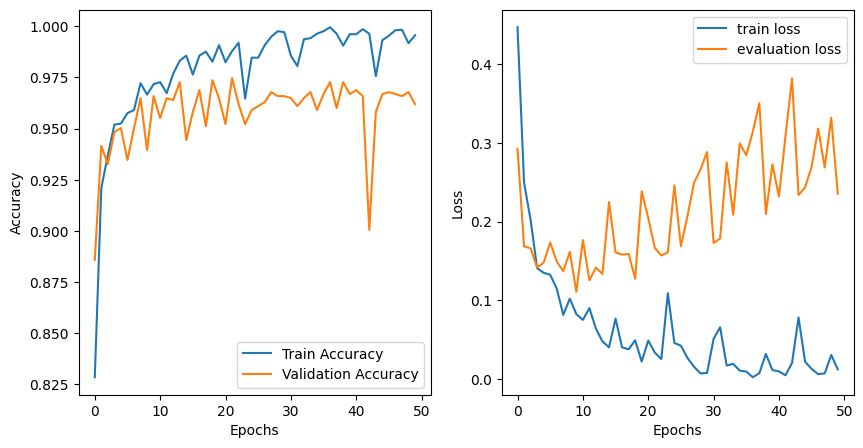

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

3/3 [==============================] - 0s 7ms/step
              precision    recall  f1-score   support

           0       0.85      0.88      0.86        25
           1       0.88      0.84      0.86        25
           2       1.00      1.00      1.00        25

    accuracy                           0.91        75
   macro avg       0.91      0.91      0.91        75
weighted avg       0.91      0.91      0.91        75



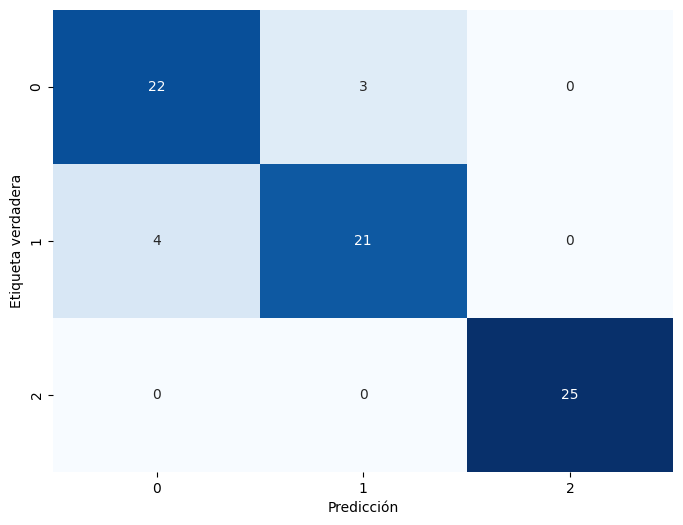

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener las predicciones del conjunto de prueba
y_pred = model.predict(X_test_norm)
y_pred = np.argmax(y_pred, axis=1)  # Convertir las predicciones a etiquetas numéricas

# Obtener las etiquetas reales del conjunto de prueba
y_true = np.argmax(y_test, axis=1)

# Generar el informe de clasificación
report = classification_report(y_true, y_pred)
print(report)

# Calcular la matriz de confusión
confusion_mat = confusion_matrix(y_true, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Etiqueta verdadera')
plt.show()


# SEGUNDA CONCLUSION AL USAR LAS TRES CARACTERISTICAS CON UN NUEVO DATASET(+600 IMGS)

Con este nuevo data set el modelo parece identificar correctamente el smoke feature, sin embargo debido al desblance de datos dado que fire tiene aproximadamente 2100, non fire 2500, y somoke solo 550. Tal vez el resultado no parezca muy favorable. Por ello se decidio combinar el antiguo dataset de somoke 3000 imagenes manipuladas + smoke 500 imagenes para balancear esta diferencia de datos. A continuacion se hace la nueva implementacion.



---



# COMBINAMOS EL NUEVO DATASET CON IMGENES REALES JUNTO CON EL DE EDICION.

Se logro conseguir un nuevo dataset con imagenes de humo de incendio forestal llamativo, que aunque solo constaba de +600 imgs parece prometedor. Decidi juntarlo con el anterior y probar...

In [ ]:
#@title **-** CARGAMOS LAS IMAGENES DE ENTRENAMIENTO PARA SMOKE DE OTRO DATASET

#CARGAMOS test de smoke
fire = "/content/Data2/train/images"
for image_name in os.listdir(fire):
  image_path = os.path.join(fire, image_name)
  image = cv2.imread(image_path)
  if image is not None:
    resized_image = cv2.resize(image, (image_size_a, image_size_b))
    images_smoke.append(resized_image)
  else:
    print(f"Error al leer la imagen: {image_path}")
print("Número de imágenes cargadas correctamente:",len(images_smoke))

Número de imágenes cargadas correctamente: 2216


In [ ]:
#@title **-** CARGAMOS LAS IMAGENES DE TESTEO PARA SMOKE NUEVAS

#CARGAMOS test de smoke
fire = "/content/Data2/test/images"

for image_name in os.listdir(fire):
  image_path = os.path.join(fire, image_name)
  image = cv2.imread(image_path)
  if image is not None:
    resized_image = cv2.resize(image, (image_size_a, image_size_b))
    images_test_smoke.append(resized_image)
  else:
    print(f"Error al leer la imagen: {image_path}")
print("Número de imágenes cargadas correctamente:",len(images_test_smoke))

Número de imágenes cargadas correctamente: 86


In [ ]:
import random

# Obtener una selección aleatoria de 2300 imágenes
images_test_smoke = random.sample(images_test_smoke, 25)

# Verificar el número de imágenes seleccionadas
print("Número de imágenes seleccionadas:", len(images_test_smoke))

Número de imágenes seleccionadas: 25


In [ ]:
#@title **-** PASAMOS LA LISTA DE SMOKE A UN ARRAY DE NUMPY
images_smoke = np.array(images_smoke);
images_test_smoke = np.array(images_test_smoke);
print("DIMENSIONES de imágenes cargadas :",images_smoke.shape)
print("DIMENSIONES de imágenes cargadas :",images_test_smoke.shape)

DIMENSIONES de imágenes cargadas : (2216, 128, 128, 3)
DIMENSIONES de imágenes cargadas : (25, 128, 128, 3)


In [ ]:
#@title **-** AGRUPAMOS LOS DATOS DE ENTRENAMINETO Y TESTEO NUEVAMENTE

X_train = np.concatenate((images_fire, images_no_fire, images_smoke))

# Concatenar los conjuntos de imágenes de prueba
X_test = np.concatenate((images_test_fire, images_test_no_fire, images_test_smoke))


# Cantidad de datos de entrenamiento y prueba
print(f"Cantidad de datos de entrenamiento: {X_train.shape[0]}")
print(f"Cantidad de datos de prueba: {X_test.shape[0]}\n")


print(f"Dimension de datos de entrenamiento: {X_train.shape}")
print(f"Dimension de datos de prueba: {X_test.shape}\n")

Cantidad de datos de entrenamiento: 6825
Cantidad de datos de prueba: 75

Dimension de datos de entrenamiento: (6825, 128, 128, 3)
Dimension de datos de prueba: (75, 128, 128, 3)



In [ ]:
#@title **-** PROCESAMIENTO Y DEFINICION DEL MODELO CNN FINAL

from tensorflow.keras import layers
from tensorflow.keras import optimizers
from sklearn.model_selection import train_test_split

# Normalización de los datos
X_train_norm = X_train / 255.0
X_test_norm = X_test / 255.0

# Etiquetas para los conjuntos de entrenamiento y prueba
y_train = np.concatenate((np.ones(len(images_fire)), np.zeros(len(images_no_fire)), np.full(len(images_smoke), 2)))
y_test = np.concatenate((np.ones(len(images_test_fire)), np.zeros(len(images_test_no_fire)), np.full(len(images_test_smoke), 2)))

# Codificación one-hot de las etiquetas
num_classes = 3
y_train = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=num_classes)

# División en conjuntos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_train_norm, y_train, test_size=0.2)



model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_size_a, image_size_b, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),  # Agregar más capas convolucionales
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),  # Aumentar el número de neuronas en la capa densa
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')
])
learning_rate=0.001
model.compile(optimizer=optimizers.Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0

In [ ]:
# Entrenamiento del modelo

epochs = 50
batch_size = 32

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))



Epoch 1/50
171/171 [==============================] - 13s 32ms/step - loss: 0.3226 - accuracy: 0.8771 - val_loss: 0.2716 - val_accuracy: 0.8945
Epoch 2/50
171/171 [==============================] - 4s 23ms/step - loss: 0.1831 - accuracy: 0.9397 - val_loss: 0.1744 - val_accuracy: 0.9363
Epoch 3/50
171/171 [==============================] - 4s 23ms/step - loss: 0.1295 - accuracy: 0.9562 - val_loss: 0.0799 - val_accuracy: 0.9685
Epoch 4/50
171/171 [==============================] - 4s 21ms/step - loss: 0.1207 - accuracy: 0.9579 - val_loss: 0.0930 - val_accuracy: 0.9663
Epoch 5/50
171/171 [==============================] - 4s 23ms/step - loss: 0.1002 - accuracy: 0.9634 - val_loss: 0.0823 - val_accuracy: 0.9648
Epoch 6/50
171/171 [==============================] - 4s 22ms/step - loss: 0.0873 - accuracy: 0.9709 - val_loss: 0.1113 - val_accuracy: 0.9619
Epoch 7/50
171/171 [==============================] - 4s 21ms/step - loss: 0.0746 - accuracy: 0.9742 - val_loss: 0.0636 - val_accuracy: 0.977

In [ ]:
# Evaluación del modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test_norm, y_test)
print(f"Pérdida en el conjunto de prueba: {loss}")
print(f"Precisión en el conjunto de prueba: {accuracy}")

3/3 [==============================] - 0s 115ms/step - loss: 2.7474 - accuracy: 0.9067
Pérdida en el conjunto de prueba: 2.7473907470703125
Precisión en el conjunto de prueba: 0.9066666960716248


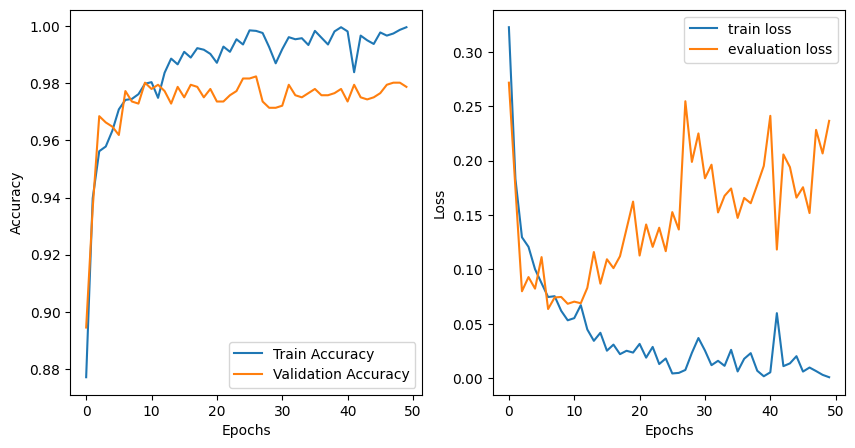

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

3/3 [==============================] - 0s 7ms/step
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        25
           1       0.86      1.00      0.93        25
           2       1.00      0.84      0.91        25

    accuracy                           0.91        75
   macro avg       0.91      0.91      0.91        75
weighted avg       0.91      0.91      0.91        75



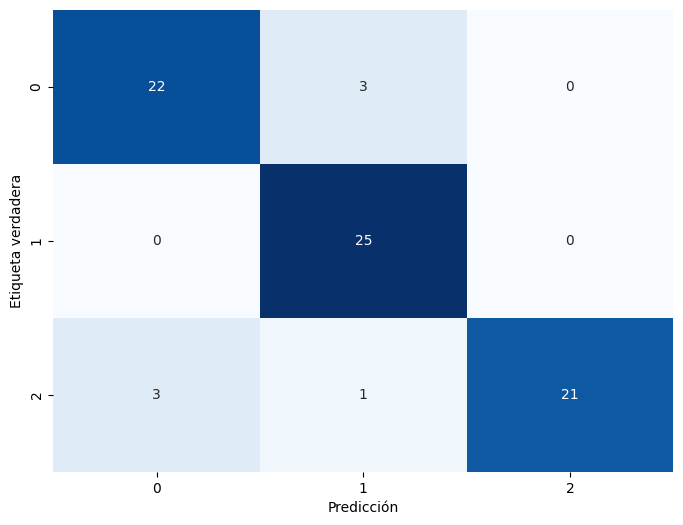

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener las predicciones del conjunto de prueba
y_pred = model.predict(X_test_norm)
y_pred = np.argmax(y_pred, axis=1)  # Convertir las predicciones a etiquetas numéricas

# Obtener las etiquetas reales del conjunto de prueba
y_true = np.argmax(y_test, axis=1)

# Generar el informe de clasificación
report = classification_report(y_true, y_pred)
print(report)

# Calcular la matriz de confusión
confusion_mat = confusion_matrix(y_true, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Etiqueta verdadera')
plt.show()


*    0 = NO FIRE

*   1 = FIRE

*   2 = SMOKE







1/1 [==============================] - 0s 21ms/step


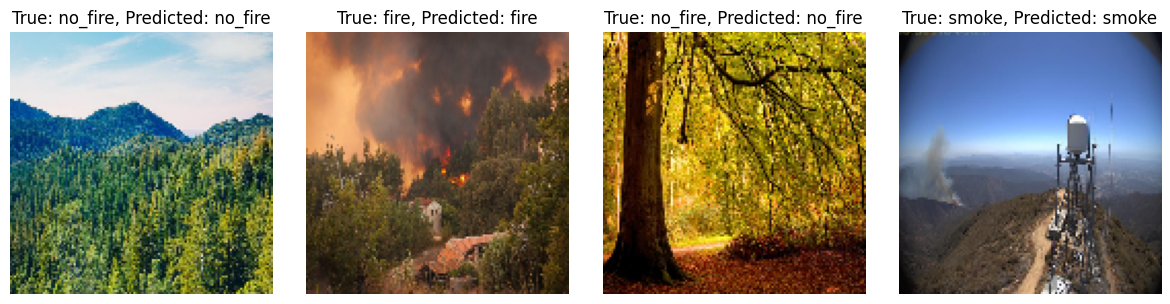

In [ ]:
import random
import matplotlib.pyplot as plt

# Selecciona cuatro imágenes al azar del conjunto de prueba de fuego
indices = random.sample(range(len(X_test)), 4)

# Crea una figura con cuatro subtramas en una fila
fig, axes = plt.subplots(1, 4, figsize=(12, 3))

# Define los nombres de las clases
class_names = ["no_fire", "fire", "smoke"]

# Itera sobre los índices seleccionados
for i, index in enumerate(indices):
    # Obtiene la imagen y la etiqueta correspondiente
    image = X_test[index]
    true_label = y_test[index]

    #img_uint8 = (img * 255).astype(np.uint8)

    # Convierte a formato RGB
    img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Agrega una dimensión adicional para que coincida con el formato de entrada del modelo
    image_input = np.expand_dims(image, axis=0)

    # Realiza la predicción del modelo
    prediction = model.predict(image_input)
    predicted_label = np.argmax(prediction)

    # Muestra la imagen en la subtrama correspondiente
    axes[i].imshow(img_rgb)
    axes[i].axis('off')
    axes[i].set_title(f"True: { class_names[np.argmax(true_label)]}, Predicted: {class_names[predicted_label]}")

# Ajusta los espacios entre subtramas y muestra la figura
plt.tight_layout()
plt.show()


1/1 [==============================] - 0s 21ms/step


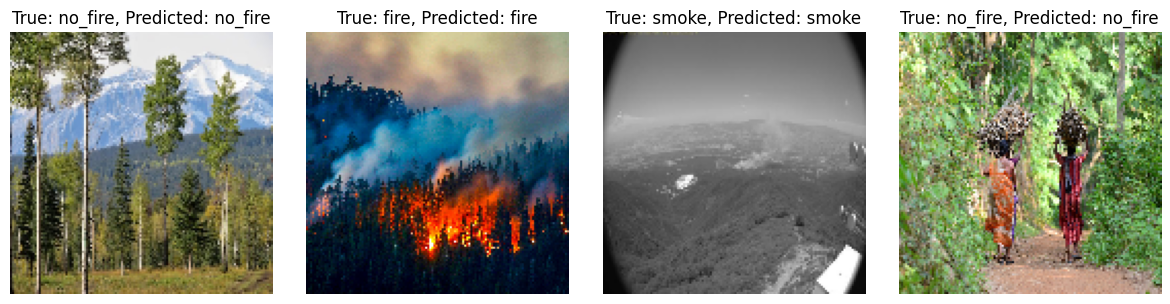

In [ ]:
import random
import matplotlib.pyplot as plt

# Selecciona cuatro imágenes al azar del conjunto de prueba de fuego
indices = random.sample(range(len(X_test)), 4)

# Crea una figura con cuatro subtramas en una fila
fig, axes = plt.subplots(1, 4, figsize=(12, 3))

# Define los nombres de las clases
class_names = ["no_fire", "fire", "smoke"]

# Itera sobre los índices seleccionados
for i, index in enumerate(indices):
    # Obtiene la imagen y la etiqueta correspondiente
    image = X_test[index]
    true_label = y_test[index]

    # Agrega una dimensión adicional para que coincida con el formato de entrada del modelo
    image_input = np.expand_dims(image, axis=0)

    # Realiza la predicción del modelo
    prediction = model.predict(image_input)
    predicted_label = np.argmax(prediction)
    # Convierte a formato RGB
    img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Muestra la imagen en la subtrama correspondiente
    axes[i].imshow(img_rgb)
    axes[i].axis('off')
    axes[i].set_title(f"True: { class_names[np.argmax(true_label)]}, Predicted: {class_names[predicted_label]}")

# Ajusta los espacios entre subtramas y muestra la figura
plt.tight_layout()
plt.show()
